In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init("/content/spark-2.4.5-bin-hadoop2.7")
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from google.colab import files
files.upload()

Saving COVID-19-geographic-disbtribution-worldwide.csv to COVID-19-geographic-disbtribution-worldwide.csv


{'COVID-19-geographic-disbtribution-worldwide.csv': b'dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp\r\n5/4/2020,4,5,2020,235,13,Afghanistan,AF,AFG,37172386,Asia\r\n5/3/2020,3,5,2020,134,4,Afghanistan,AF,AFG,37172386,Asia\r\n5/2/2020,2,5,2020,164,4,Afghanistan,AF,AFG,37172386,Asia\r\n5/1/2020,1,5,2020,222,4,Afghanistan,AF,AFG,37172386,Asia\r\n4/30/2020,30,4,2020,122,0,Afghanistan,AF,AFG,37172386,Asia\r\n4/29/2020,29,4,2020,124,3,Afghanistan,AF,AFG,37172386,Asia\r\n4/28/2020,28,4,2020,172,0,Afghanistan,AF,AFG,37172386,Asia\r\n4/27/2020,27,4,2020,68,10,Afghanistan,AF,AFG,37172386,Asia\r\n4/26/2020,26,4,2020,112,4,Afghanistan,AF,AFG,37172386,Asia\r\n4/25/2020,25,4,2020,70,1,Afghanistan,AF,AFG,37172386,Asia\r\n4/24/2020,24,4,2020,105,2,Afghanistan,AF,AFG,37172386,Asia\r\n4/23/2020,23,4,2020,84,4,Afghanistan,AF,AFG,37172386,Asia\r\n4/22/2020,22,4,2020,61,1,Afghanistan,AF,AFG,37172386,Asia\r\n4/21/2020,21,4,2020,35,2,Afghanista

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
# Membaca dataset
dataset = spark.read.csv('COVID-19-geographic-disbtribution-worldwide.csv', inferSchema=True, header=True)
# membentuk Vector Variabel independen
assembler = VectorAssembler(inputCols = ['cases'], outputCol ='data_case')
# memilih variabel independen dan dependen
regressor = LinearRegression(featuresCol = 'data_case', labelCol = 'deaths')
# menentukan data latih dari assembler dan dataset
regressor = regressor.fit(assembler.transform(dataset))

In [ ]:
b = regressor.coefficients
a = regressor.intercept
print ("Nilai koefisien regresi (b) : %a" %b)
print ("Nilai konstanta (a) : %f" %a)

Nilai koefisien regresi (b) : DenseVector([0.0646])
Nilai konstanta (a) : 1.545274


In [ ]:
import pandas as pd
data = pd.read_csv('COVID-19-geographic-disbtribution-worldwide.csv')
dataset = spark.read.csv('COVID-19-geographic-disbtribution-worldwide.csv', inferSchema=True, header=True)
print(data)

         dateRep  day  month  ...  countryterritoryCode  popData2018  continentExp
0       5/4/2020    4      5  ...                   AFG   37172386.0          Asia
1       5/3/2020    3      5  ...                   AFG   37172386.0          Asia
2       5/2/2020    2      5  ...                   AFG   37172386.0          Asia
3       5/1/2020    1      5  ...                   AFG   37172386.0          Asia
4      4/30/2020   30      4  ...                   AFG   37172386.0          Asia
...          ...  ...    ...  ...                   ...          ...           ...
14861  3/25/2020   25      3  ...                   ZWE   14439018.0        Africa
14862  3/24/2020   24      3  ...                   ZWE   14439018.0        Africa
14863  3/23/2020   23      3  ...                   ZWE   14439018.0        Africa
14864  3/22/2020   22      3  ...                   ZWE   14439018.0        Africa
14865  3/21/2020   21      3  ...                   ZWE   14439018.0        Africa

[14

In [ ]:
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
engine=create_engine('sqlite:///:memory:')
data.to_sql('COVID19', engine)
res1=pd.read_sql_query('Select * from COVID19', engine)
res1=pd.read_sql_query('Select countriesAndTerritories, sum(deaths) as death from COVID19 where continentExp = "Asia" group by geoId', engine)
res2=pd.read_sql_query('Select * from COVID19', engine)
res2=pd.read_sql_query('Select countriesAndTerritories, sum(cases) as cases from COVID19 where continentExp = "Asia" group by geoId', engine)
print(res1)
print(res2)

   countriesAndTerritories  death
0     United_Arab_Emirates    126
1              Afghanistan     85
2               Bangladesh    177
3                  Bahrain      8
4        Brunei_Darussalam      1
5                   Bhutan      0
6                    China   4637
7                Indonesia    845
8                   Israel    232
9                    India   1373
10                    Iraq     97
11                    Iran   6203
12                  Jordan      9
13                   Japan    510
14              Kyrgyzstan     10
15                Cambodia      0
16             South_Korea    252
17                  Kuwait     38
18              Kazakhstan     27
19                    Laos      0
20                 Lebanon     25
21               Sri_Lanka      7
22                 Myanmar      6
23                Mongolia      0
24                Maldives      1
25                Malaysia    105
26                   Nepal      0
27                    Oman     12
28            

In [ ]:
#X1 menunjukkan kasus COVID19 di Negara Vietnam
#Y1 menunjukkan kematian di Negara Vietnam
X1=271
Y1=a+b*X1
print("Kasus di Vietnam : ", X1)
print("Kematian : ", Y1)

#X2 menunjukkan kasus COVID19 di Negara Taiwan
#Y2 menunjukkan kematian di Negara Taiwan
X2=436
Y2=a+b*X2
print("Kasus di Taiwan : ", X2)
print("Kematian : ", Y2)

Kasus di Vietnam :  271
Kematian :  [19.053282464969605]
Kasus di Taiwan :  436
Kematian :  [29.713140178755285]


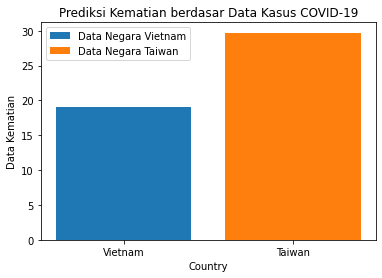

In [ ]:
#1 Import library matplotlib dengan alias plt
import matplotlib.pyplot as plt
#2 Data Vietnam dan Data Taiwan
datax_a1 = "Vietnam"
datay_a2 = Y1

datax_b1 = "Taiwan"
datay_b2 = Y2

#3 Properti Label Legend
label_a = "Data Negara Vietnam"
label_b = "Data Negara Taiwan"

#4 Properti Label Diagram
x_label = "Country"
y_label = "Data Kematian"

#5 Properti Judul Diagram
judul = "Prediksi Kematian berdasar Data Kasus COVID-19"

#6 PROSES MEMBUAT DIAGRAM
plt.bar(datax_a1, datay_a2, label=label_a) #7
plt.bar(datax_b1, datay_b2, label = label_b) #8
plt.legend() #9
plt.xlabel(x_label) #10
plt.ylabel(y_label) #11
plt.title(judul) #12

plt.show() #17